## 1. Lectura datos

In [1]:
import pandas as pd

datos_sign = pd.read_csv('data/sign-language.csv')

In [310]:
datos_sign = datos_sign[datos_sign['condition']=='Transmission + Interaction']
#datos_sign = datos_sign[datos_sign['chain']=='chain1']

In [311]:
datos_sign

,acc,chain,code_string,condition,director,ent_type,generation,guess_time,markerPres,model,participant,phase,selected,target,terminator,trial,verb,vid_len,code_len,num_reps
0,NaN,chain1,"2hMustache,2hHat,1hHoldPan<shake>,2hHoldPan<sh...",Transmission + Interaction,B,person,0,NaN,n,NaN,s25,testing,NaN,chef,NaN,NaN,N,NaN,5.0,0.0
1,NaN,chain1,"2hOpenBook,(1hPalm,1hPointatObj<atObj>)+look+n...",Transmission + Interaction,B,loc,0,NaN,n,NaN,s26,testing,NaN,restaurant,NaN,NaN,N,NaN,4.0,0.0
2,NaN,chain1,"2hPan.Outline,2hHoldPan<shake>,(1hHoldPan<shak...",Transmission + Interaction,A,obj,0,NaN,n,NaN,s3,testing,NaN,frying pan,NaN,NaN,N,NaN,6.0,2.0
3,NaN,chain1,"2hBowl-Mix,1hPour<left>,1hPour<right>,2hBowl-M...",Transmission + Interaction,A,act,0,NaN,n,NaN,s4,testing,NaN,to cook,NaN,NaN,Y,NaN,6.0,2.0
4,NaN,chain1,"2hPray,1hCollar,2hPray,nod",Transmission + Interaction,A,person,0,NaN,n,NaN,s5,testing,NaN,vicar,NaN,NaN,N,NaN,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1.0,chain5,"2hBowl-Mix,2hHat",Transmission + Interaction,B,person,5,1.959648,n,full48,full50,testing,chef,chef,matcher,26.0,N,3.624580,2.0,0.0
1316,1.0,chain5,"1hFist<leftright-repeated>,(Sing+1hMicrophone<...",Transmission + Interaction,B,loc,5,6.547569,y,full48,full50,testing,concert hall,concert hall,matcher,0.0,N,4.539133,3.0,0.0
1317,1.0,chain5,"2hCamera<asymm-pressRepeated*2>,1hPointSelf<se...",Transmission + Interaction,B,person,5,2.177325,y,full48,full50,testing,photographer,photographer,matcher,32.0,N,2.327326,2.0,0.0
1318,1.0,chain5,Sing+1hMicrophone<hold>,Transmission + Interaction,B,act,5,2.142911,n,full48,full50,testing,to sing,to sing,director,22.0,Y,2.184702,1.0,0.0


In [316]:
list_sign = [list(datos_sign['generation']),list(datos_sign['code_string'])]

In [317]:
dict_sign = {i:[] for i in [0,1,2,3,4,5]}

In [318]:
for i in range(len(list_sign[0])):
    dict_sign[list_sign[0][i]]+=[list_sign[1][i]]

In [319]:
dict_sign_split = {}

In [320]:
import re

reg = r'1h.*?\b|2h.*?\b'

regex=re.compile(reg)

for key in dict_sign.keys():
    L = dict_sign[key]
    L = [re.findall(regex,x) for x in L if str(x) != 'nan']
    dict_sign[key] = [x for x in L if len(x)>1]

In [321]:
dict_sign

{0: [['2hMustache', '2hHat', '1hHoldPan', '2hHoldPan', '1hPour'],
  ['2hOpenBook', '1hPalm', '1hPointatObj', '2hDine'],
  ['2hPan', '2hHoldPan', '1hHoldPan', '1hStir', '2hHoldPan', '2hHoldPan'],
  ['2hBowl', '1hPour', '1hPour', '2hBowl', '2hPush', '2hPull'],
  ['2hPray', '1hCollar', '2hPray'],
  ['2hTurnPage', '1hPalm', '1hPointatObj', '2hPray'],
  ['1hThumbSelf', '2hCamera'],
  ['1hSee', '2hPalm'],
  ['2hCamera', '2hCamera', '2hLens'],
  ['1hSing', '1hSing'],
  ['2hBox', '2hSpace', '2hSing', '2hViolin', '2hSpace'],
  ['1hMicrophone', '1hMicrophone', '1hPointatObj'],
  ['1hScissors', '1hScissors', '1hScissors'],
  ['2hScissors', '2hFluff', '2hHair'],
  ['1hScissors', '1hScissors'],
  ['1hScissors', '2hScissors', '2hScissors'],
  ['1hPoint', '1hBadge', '1hPoint', '2hHat', '1hKnock', '1hFist'],
  ['1hPalm', '2hHoldBars', '2hHoldBars'],
  ['2hFists', '2hFists'],
  ['2hMustache', '2hHat', '1hHoldPan', '2hHoldPan', '1hPour'],
  ['1hDine', '1hChat'],
  ['2hPan', '2hHoldPan', '1hHoldPan', '1h

In [322]:
ngramas = {}

for key in dict_sign.keys():
    L = []
    for l in dict_sign[key]:
        L += list(zip(l,l[1:]))
    ngramas[key] = L

In [323]:
ngramas[0][:5]

[('2hMustache', '2hHat'),
 ('2hHat', '1hHoldPan'),
 ('1hHoldPan', '2hHoldPan'),
 ('2hHoldPan', '1hPour'),
 ('2hOpenBook', '1hPalm')]

In [324]:
entropias = {}

In [325]:
from collections import Counter
from scipy.stats import entropy
import math

entropias = {}

for key in ngramas.keys():
    C = list(dict(Counter(NGRAMAS[key])).values())
    H = entropy(C,base = sum(C))
    entropias[key] = H

In [326]:
entropias

{0: 0.8360639664938299,
 1: 0.7429888296325086,
 2: 0.6971374526033617,
 3: 0.629006546526151,
 4: 0.5580368843863757,
 5: 0.5438110067044579}

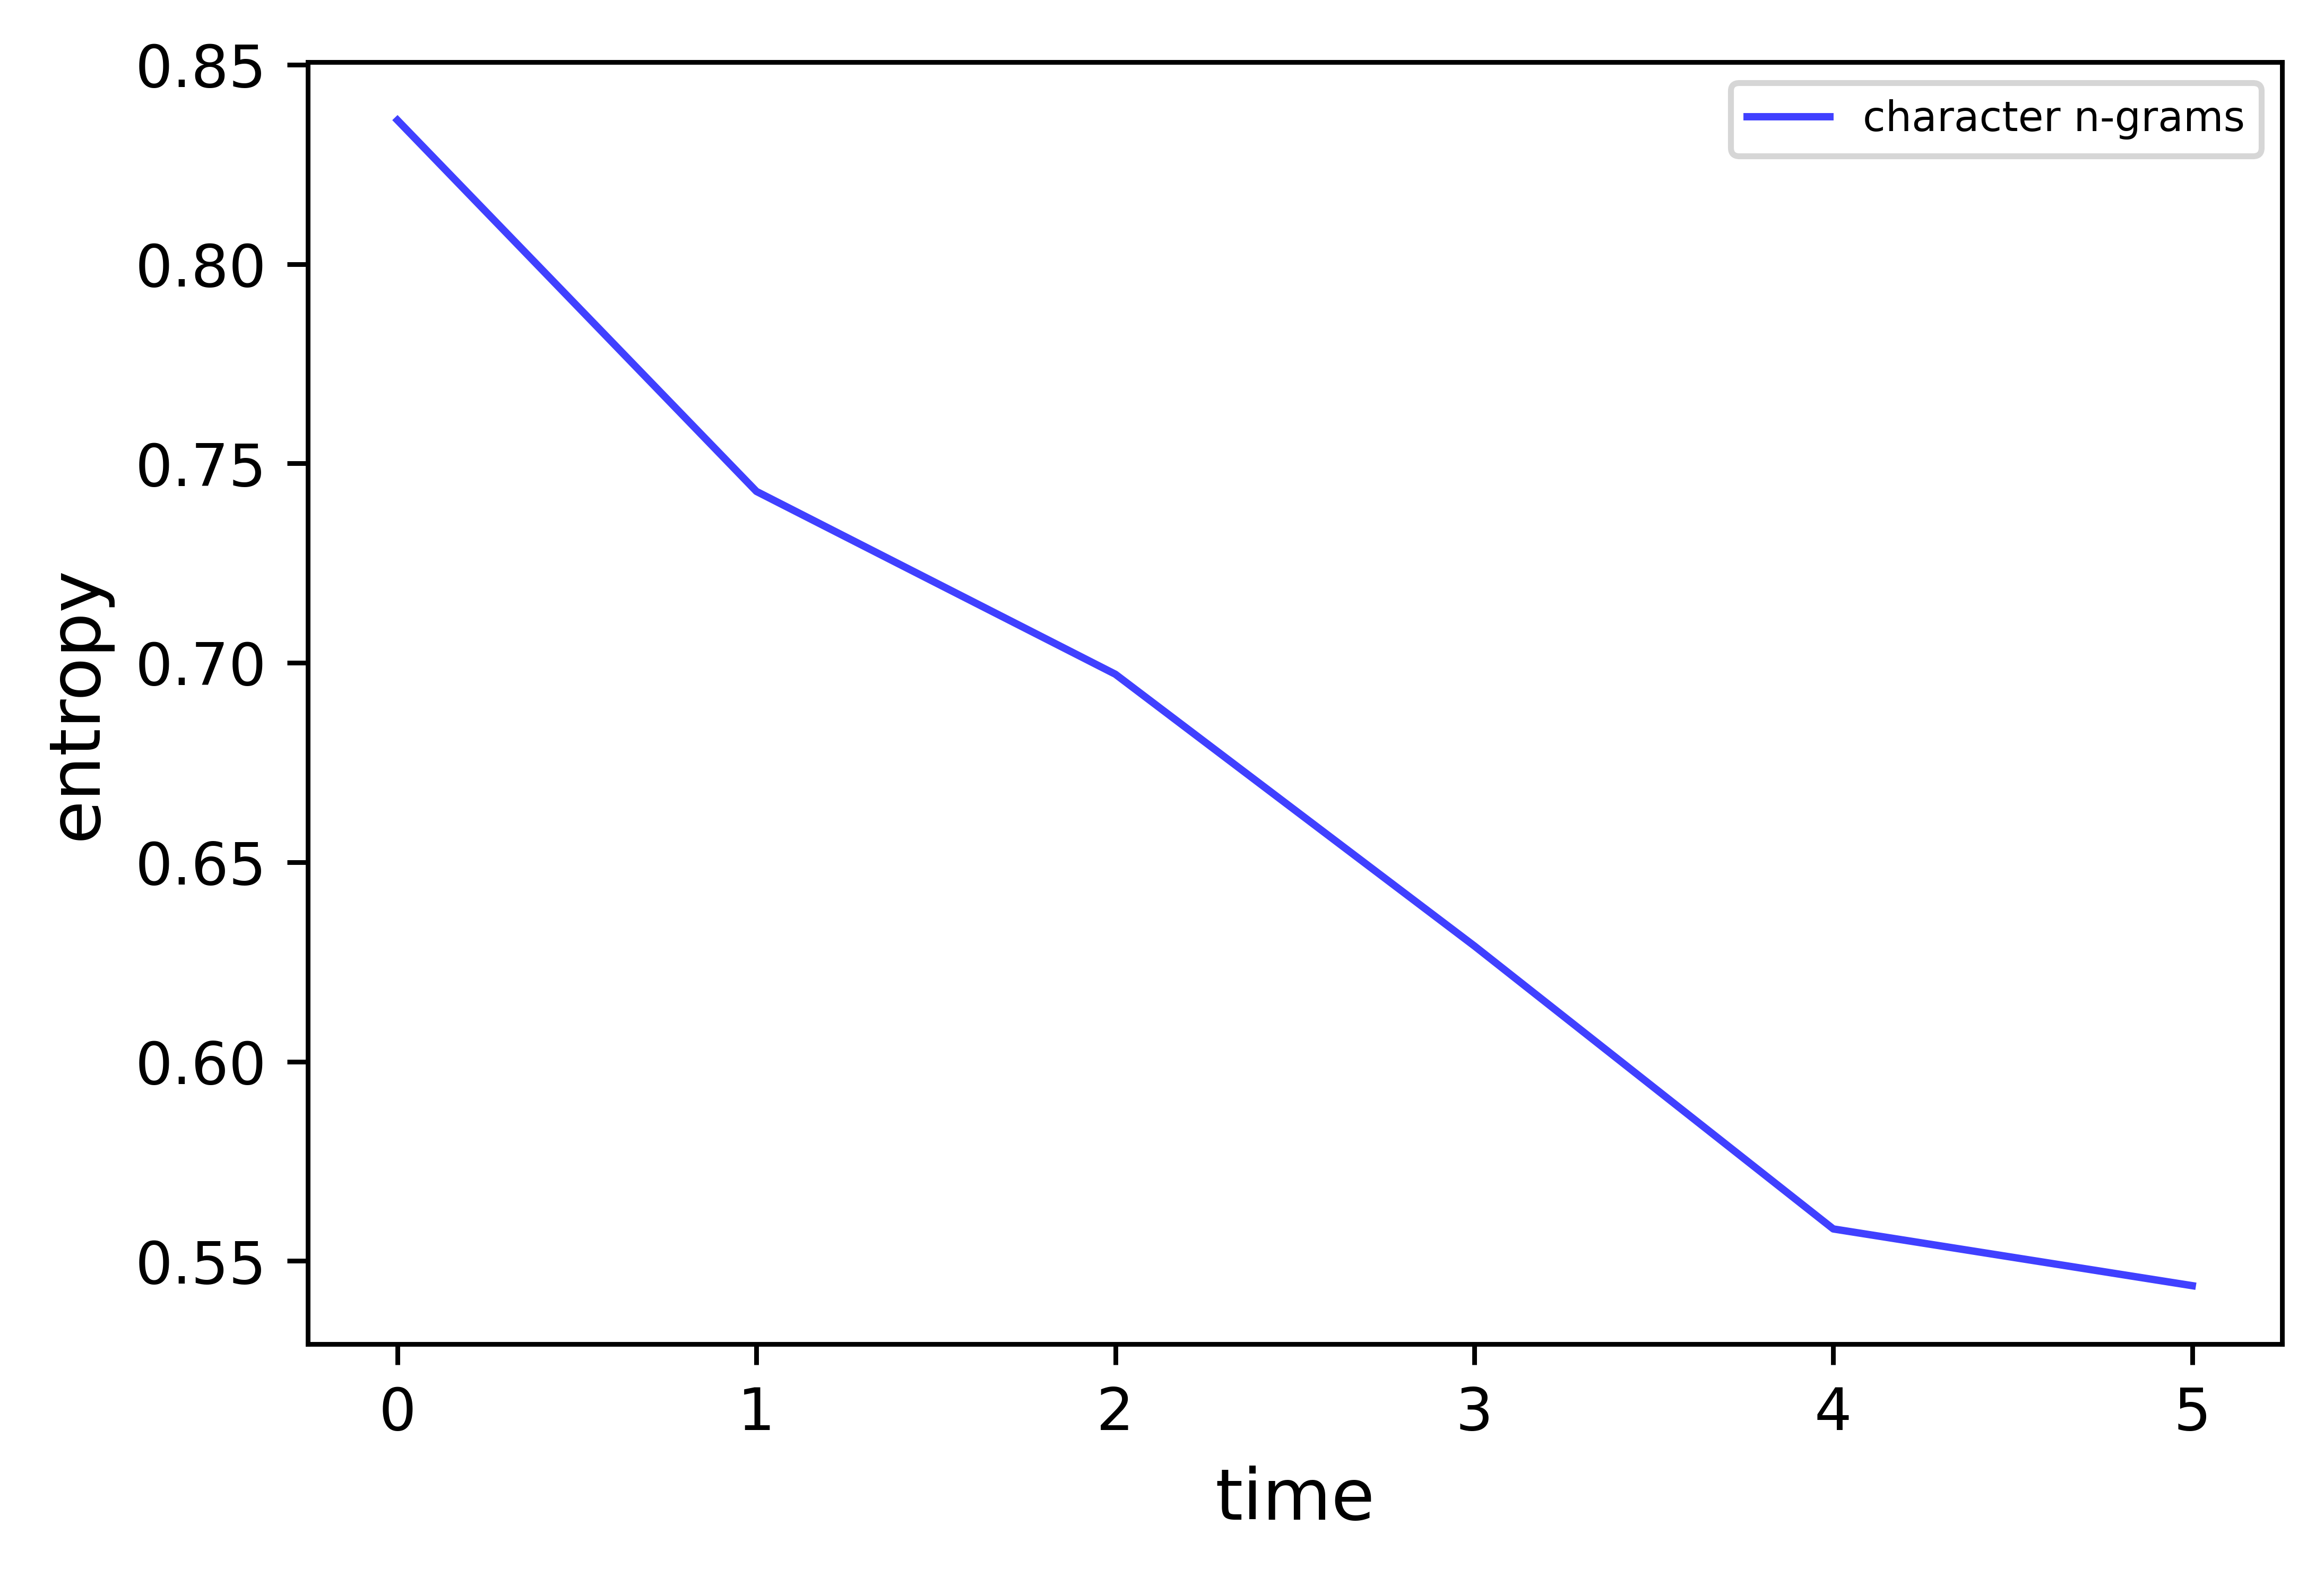

In [327]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

ax.plot(range(len(entropias.keys())),entropias.values(),color='blue',linewidth=1.25,markersize=0,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',label='character n-grams')

#ax.plot(range(1,len(energy_monkey_mean)+1),energy_monkey_mean,color='r',linewidth=1.75,markersize=0,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',label='all trajectories')

plt.grid(False)
plt.legend(loc='best',fontsize=7)
plt.ylabel(r'entropy',fontsize=12)
plt.xlabel(r'time',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('entropy_time_sign.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()